Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.
Your job is to build a model that will predict the price of a house based on features provided in the dataset. Senior management also wants to explore the characteristics of the houses using some business intelligence tools. One of those parameters includes understanding which factors are responsible for higher property value - $650K and above.

# Importing the necessary libraries.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
import math
import datetime
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import cohen_kappa_score
from imblearn.over_sampling import SMOTE

In [117]:
%matplotlib inline

In [118]:
pd.set_option('display.max_columns',None)

# Loading the database 

In [119]:
data = pd.read_excel('regression_data1.xls')

In [120]:
data.head()

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1  6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2  5631500400 2015-02-25         2       1.00          770     10000     1.0   
3  2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4  1954400510 2015-02-18         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000

In [121]:
data.shape

(21597, 21)

In [122]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [123]:
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [124]:
data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

# Analysing the independent variables

## Analysing ordinal categoricals 

In [125]:
data['bedrooms'].value_counts()   #Perhaps removing the properties with 33 rooms. Outlier or mistake. 
#Group in less categories? 1 and 2 rooms// five or more.Imbalance in the sample. Our database is concentrated in the 3-4 rooms categories. 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [126]:
data['bathrooms'].value_counts() 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [127]:
data['floors'].value_counts() #We have mostly flats in our database and townhouses, group also here 2 floors and more. 

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

We have mostly flats in our database and townhouses, group also here 2 floors and more. 

In [128]:
data['waterfront'].value_counts() 

0    21434
1      163
Name: waterfront, dtype: int64

Imbalance: most of the houses in one category. Visualizing the data with tableau, it seems that waterfront is defined very restrictively.

In [129]:
data['view'].value_counts() 

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

#Most of the houses view category 0 Center of the city? lower floors in apartment buildings?

In [130]:
data['condition'].value_counts() 

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [131]:
#Imbalance towards average to good condition.

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


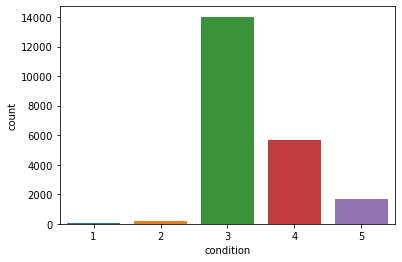

In [132]:
sns.countplot('condition', data=data);
plt.show()


In [133]:
data['grade'].value_counts() 

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


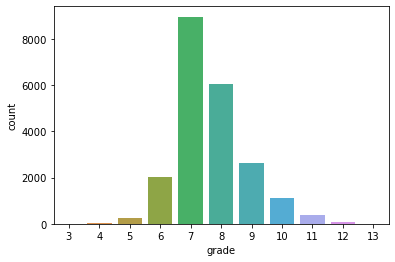

In [134]:
sns.countplot('grade', data=data);
plt.show()

## Analysing date column

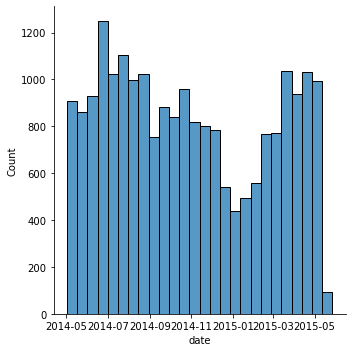

In [135]:
sns.displot(data=data, x="date");


Latitute, longitude give the exact location, there is no need for the zip code. We can remove one of the two.Check which one makes more sense. Stock located in Seattle and its environments. Houses above 650k located in the waterfront, the upper part of the city, islands or proximity to water. 


## Analysing latitude and longitude

To make location meaningful for our regression, we could reference the location of each house by the proximity to locations that are valuable to inhabitants of the city, for ie distance to the airport, distance to recreational areas, to shopping centers or  distance to nature areas (parks, lakes or sea). We will use the euclidean distance to:  1)Seattle city center.The coordinates to Seattle city  are: latitude = 47.608013 and longitude = -122.335167. We calculate a new column dist_to_the_center. We try also with other coordinates such as: distance to the centre of Belle Vue (one of the neighborhoods with the most expensive houses: lat = 47.6303, lon = 122.2150; distance to the city center: lat = 47.621214 and lon = -122.349809).We will keep distance to the center of Belle Vue.

Another approach is to convert the zip code into a categorical variable and apply One Hot Encoder. 

## Analysing continuous variables


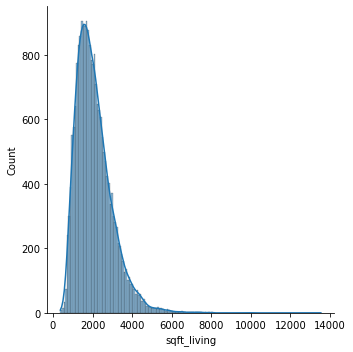

In [136]:
sns.displot(data=data, x="sqft_living", kde=True);

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


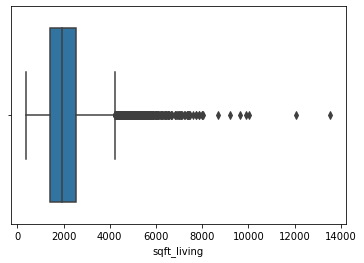

In [137]:
sns.boxplot('sqft_living', data=data);

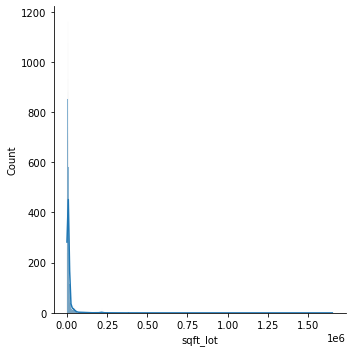

In [138]:
sns.displot(data=data, x="sqft_lot", kde=True); #Is this so because we have many flats? 

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


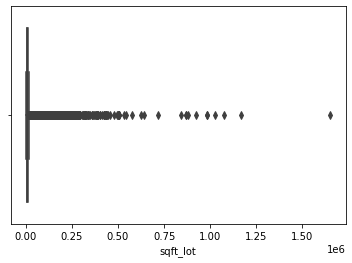

In [139]:
sns.boxplot('sqft_lot', data=data);

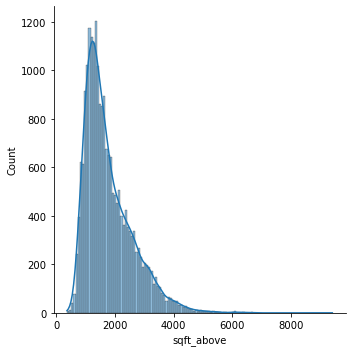

In [140]:
sns.displot(data=data, x="sqft_above", kde=True);

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


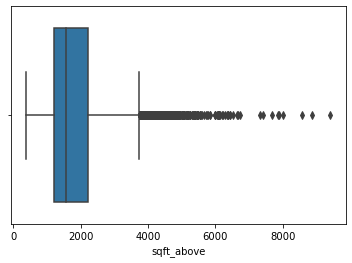

In [141]:
sns.boxplot('sqft_above', data=data);

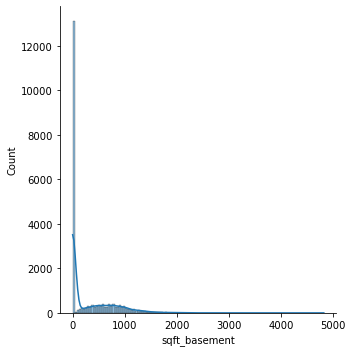

In [142]:
sns.displot(data=data, x="sqft_basement", kde=True);

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


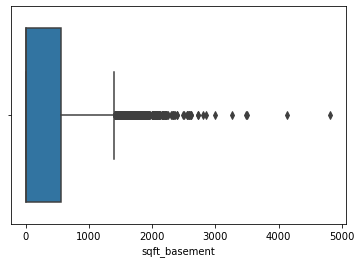

In [143]:
sns.boxplot('sqft_basement', data=data);

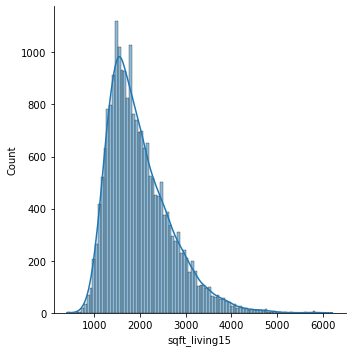

In [144]:
sns.displot(data=data, x="sqft_living15", kde=True);

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


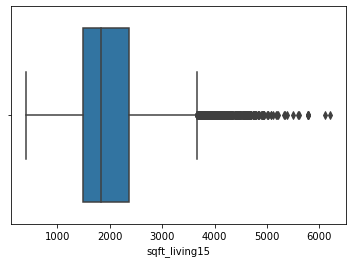

In [145]:
sns.boxplot("sqft_living15", data=data);

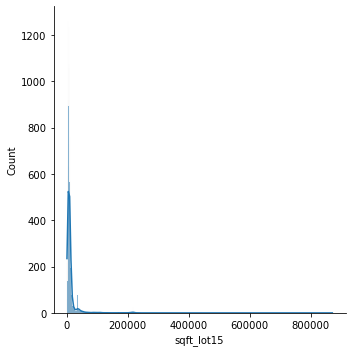

In [146]:
sns.displot(data=data, x="sqft_lot15", kde=True);

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


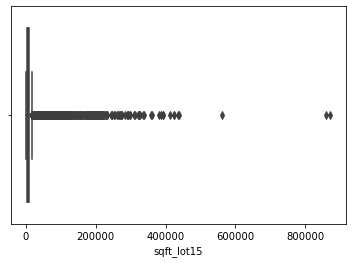

In [147]:
sns.boxplot("sqft_lot15", data=data);

## Analysing the dependent variable

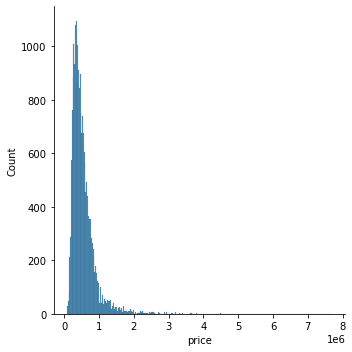

In [148]:
sns.displot(data=data, x="price")

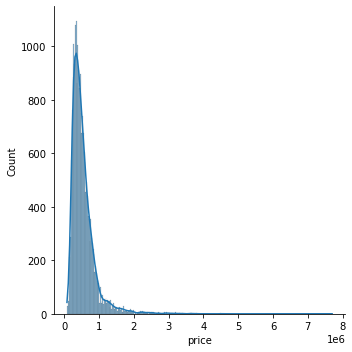

In [149]:
sns.displot(data=data, x="price", kde=True);

Sample collects observations between may 2014 and 2015. It seems more interesting to extract the month as an explicative variable. Seems there are four months during which sales are lower.  

Compare square living and square living 15 to see how many houses have been renovated. See if we can drop any of these columns. Plot the numeric continous variables.  

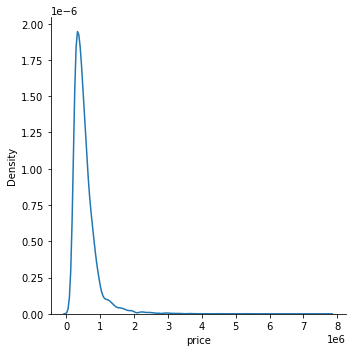

In [150]:
sns.displot(data=data, x="price", kind="kde");

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


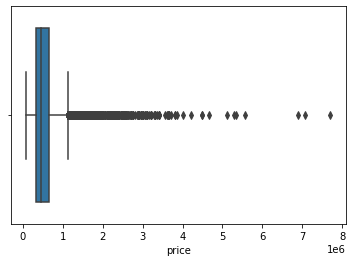

In [151]:
sns.boxplot('price', data=data);

## Preparing the database for modelling

In [152]:
df=data.copy()

#### Extracting month of the year as a new column

In [153]:
df['month'] = df['date'].dt.month 
df.head()

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1  6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2  5631500400 2015-02-25         2       1.00          770     10000     1.0   
3  2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4  1954400510 2015-02-18         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  \
0             0    98178  47.5112 -122.257           1340        5650  221900   
1          1991    98125  47.7210 -122.319           1690        7639  538000   
2             0    98028  47.7379 -122.233           2720        8062  180000   
3             0    98136  47.5208 -122.393           1360        5000  604000   
4             0    98074  47.6168 -122.045           1800        7503  510000   

   month  
0     10  
1     12  
2      2  
3     12  
4      2

#### Dropping columns and row house 33 bedrooms

In [154]:
df.drop('date', axis=1, inplace=True)

In [155]:
df.drop('id', axis=1, inplace=True)

In [156]:
data[data['bedrooms']==33]   ##do I need to reset the index??? ##df.reset_index(inplace = True)

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
15856  2402100895 2014-06-25        33       1.75         1620      6000   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
15856     1.0           0     0          5      7        1040            580   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15856      1947             0    98103  47.6878 -122.331           1330   

       sqft_lot15   price  
15856        4700  640000

In [157]:
df.drop([df.index[15856]])

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131     3.0           0     0   
21593         4       2.50         2310      5813     2.0           0     0   
21594         2       0.75         1020      1350     2.0           0     0   
21595         3       2.50         1600      2388     2.0           0     0   
21596         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180              0      1955             0   
1              3      7        2170            400      1951          1991   
2              3      6         770              0      1933             0   
3              5      7        1050            910      1965             0   
4              3      8        1680              0      1987             0   
...          ...    ...         ...            ...       ...           ...   
21592          3      8        1530              0      2009             0   
21593          3      8        2310              0      2014             0   
21594          3      7        1020              0      2009             0   
21595          3      8        1600              0      2004             0   
21596          3      7        1020              0      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15   price  month  
0        98178  47.5112 -122.257           1340        5650  221900     10  
1        98125  47.7210 -122.319           1690        7639  538000     12  
2        98028  47.7379 -122.233           2720        8062  180000      2  
3        98136  47.5208 -122.393           1360        5000  604000     12  
4        98074  47.6168 -122.045           1800        7503  510000      2  
...        ...      ...      ...            ...         ...     ...    ...  
21592    98103  47.6993 -122.346           1530        1509  360000      5  
21593    98146  47.5107 -122.362           1830        7200  400000      2  
21594    98144  47.5944 -122.299           1020        2007  402101      6  
21595    98027  47.5345 -122.069           1410        1287  400000      1  
21596    98144  47.5941 -122.299           1020        1357  325000     10  

[21596 rows x 20 columns]

#### Calculating distance to the centre

In [158]:
long_to_centre = df['long']- (-122.2150)
lat_to_centre = df['lat']-47.6303
df['dist_to_centre'] = np.sqrt(long_to_centre**2 + lat_to_centre**2)

In [159]:
#df['lat_to_centre'] =

#### Reordering columns and adding dist_to_centre

In [160]:
df = df[['bedrooms', 'bathrooms','floors','waterfront', 'view', 'condition', 'grade', 
          'sqft_living', 'sqft_living15', 'sqft_lot','sqft_lot15','sqft_above','sqft_basement',
          'yr_built', 'yr_renovated', 'month', 'zipcode','dist_to_centre', 'lat', 'long','price']]

In [161]:
df.head()

bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0         3       1.00     1.0           0     0          3      7   
1         3       2.25     2.0           0     0          3      7   
2         2       1.00     1.0           0     0          3      6   
3         4       3.00     1.0           0     0          5      7   
4         3       2.00     1.0           0     0          3      8   

   sqft_living  sqft_living15  sqft_lot  sqft_lot15  sqft_above  \
0         1180           1340      5650        5650        1180   
1         2570           1690      7242        7639        2170   
2          770           2720     10000        8062         770   
3         1960           1360      5000        5000        1050   
4         1680           1800      8080        7503        1680   

   sqft_basement  yr_built  yr_renovated  month  zipcode  dist_to_centre  \
0              0      1955             0     10    98178        0.126289   
1            400      1951          1991     12    98125        0.137995   
2              0      1933             0      2    98028        0.109095   
3            910      1965             0     12    98136        0.208984   
4              0      1987             0      2    98074        0.170535   

       lat     long   price  
0  47.5112 -122.257  221900  
1  47.7210 -122.319  538000  
2  47.7379 -122.233  180000  
3  47.5208 -122.393  604000  
4  47.6168 -122.045  510000

## Correlations


### Correlation matrix and heatmap

In [162]:
correlations_matrix = df.corr()
display(correlations_matrix)

bedrooms  bathrooms    floors  waterfront      view  \
bedrooms        1.000000   0.514508  0.177944   -0.006834  0.080008   
bathrooms       0.514508   1.000000  0.502582    0.063744  0.188386   
floors          0.177944   0.502582  1.000000    0.023755  0.028814   
waterfront     -0.006834   0.063744  0.023755    1.000000  0.401971   
view            0.080008   0.188386  0.028814    0.401971  1.000000   
condition       0.026496  -0.126479 -0.264075    0.016611  0.045999   
grade           0.356563   0.665838  0.458794    0.082888  0.251728   
sqft_living     0.578212   0.755758  0.353953    0.103854  0.284709   
sqft_living15   0.393406   0.569884  0.280102    0.086507  0.280681   
sqft_lot        0.032471   0.088373 -0.004814    0.021632  0.074900   
sqft_lot15      0.030690   0.088303 -0.010722    0.030781  0.072904   
sqft_above      0.479386   0.686668  0.523989    0.072109  0.167609   
sqft_basement   0.302808   0.283440 -0.245715    0.080559  0.277078   
yr_built        0.155670   0.507173  0.489193   -0.026153 -0.053636   
yr_renovated    0.018389   0.050544  0.006427    0.092873  0.103951   
month          -0.001046   0.007543  0.014245    0.008148 -0.005398   
zipcode        -0.154092  -0.204786 -0.059541    0.030272  0.084622   
dist_to_centre -0.056957  -0.027621  0.010179   -0.005964 -0.030851   
lat            -0.009951   0.024280  0.049239   -0.014306  0.005871   
long            0.132054   0.224903  0.125943   -0.041904 -0.078107   
price           0.308787   0.525906  0.256804    0.266398  0.397370   

                condition     grade  sqft_living  sqft_living15  sqft_lot  \
bedrooms         0.026496  0.356563     0.578212       0.393406  0.032471   
bathrooms       -0.126479  0.665838     0.755758       0.569884  0.088373   
floors          -0.264075  0.458794     0.353953       0.280102 -0.004814   
waterfront       0.016611  0.082888     0.103854       0.086507  0.021632   
view             0.045999  0.251728     0.284709       0.280681  0.074900   
condition        1.000000 -0.146896    -0.059445      -0.093072 -0.008830   
grade           -0.146896  1.000000     0.762779       0.713867  0.114731   
sqft_living     -0.059445  0.762779     1.000000       0.756402  0.173453   
sqft_living15   -0.093072  0.713867     0.756402       1.000000  0.144763   
sqft_lot        -0.008830  0.114731     0.173453       0.144763  1.000000   
sqft_lot15      -0.003126  0.120981     0.184342       0.183515  0.718204   
sqft_above      -0.158904  0.756073     0.876448       0.731767  0.184139   
sqft_basement    0.173849  0.168220     0.435130       0.200443  0.015418   
yr_built        -0.361592  0.447865     0.318152       0.326377  0.052946   
yr_renovated    -0.060788  0.014261     0.055308      -0.002695  0.007686   
month            0.022388  0.008989     0.012112       0.002513 -0.002591   
zipcode          0.002888 -0.185771    -0.199802      -0.279299 -0.129586   
dist_to_centre  -0.067423 -0.115237    -0.066440      -0.063544  0.209082   
lat             -0.015102  0.113575     0.052155       0.048679 -0.085514   
long            -0.105877  0.200341     0.241214       0.335626  0.230227   
price            0.036056  0.667951     0.701917       0.585241  0.089876   

                sqft_lot15  sqft_above  sqft_basement  yr_built  yr_renovated  \
bedrooms          0.030690    0.479386       0.302808  0.155670      0.018389   
bathrooms         0.088303    0.686668       0.283440  0.507173      0.050544   
floors           -0.010722    0.523989      -0.245715  0.489193      0.006427   
waterfront        0.030781    0.072109       0.080559 -0.026153      0.092873   
view              0.072904    0.167609       0.277078 -0.053636      0.103951   
condition        -0.003126   -0.158904       0.173849 -0.361592     -0.060788   
grade             0.120981    0.756073       0.168220  0.447865      0.014261   
sqft_living       0.184342    0.876448       0.435130  0.318152      0.055308   
sqft_living15     0.183515   

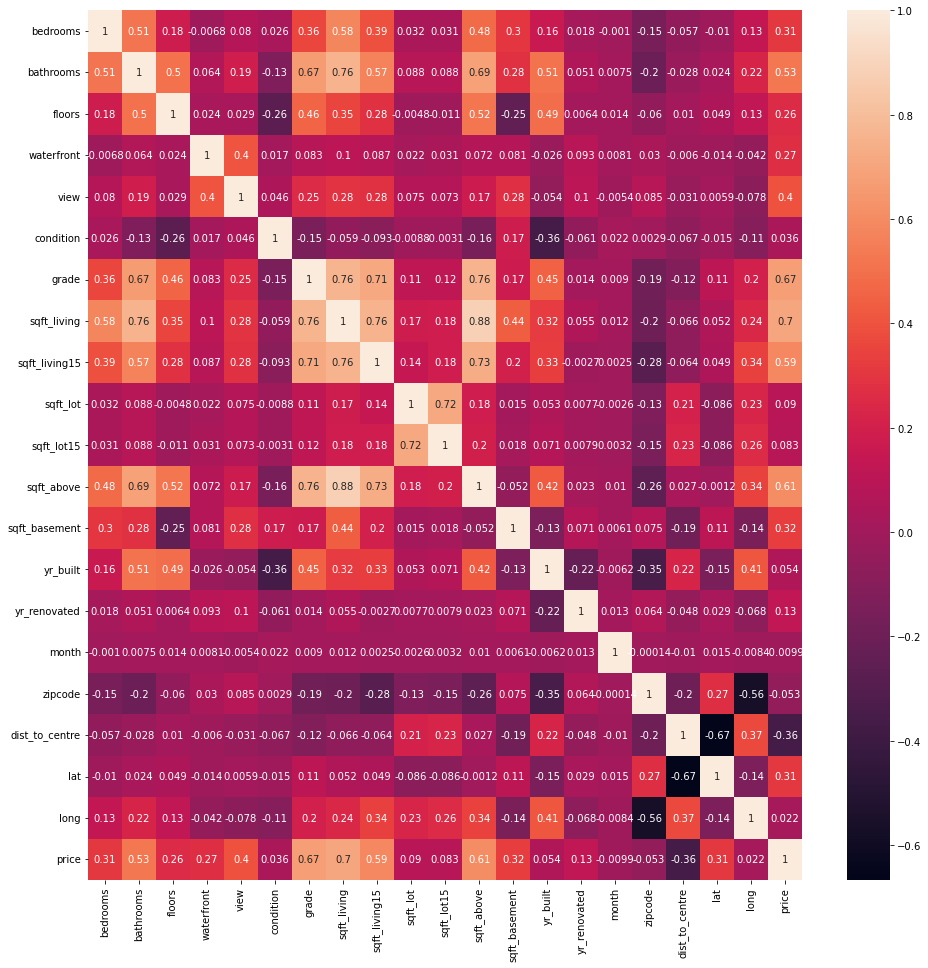

In [163]:
f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(correlations_matrix, annot= True)
plt.show()

In [164]:
#sns.pairplot(df)
#pairplotplt.show()

#### Checking for multicollinearity

We drop: sqft_above, its high correlation with sqft_living (0,88) can generate multicollinearity in the model. 

#### Selecting the variables for the model. 

In [165]:
df1 = df[['bedrooms', 'bathrooms','floors','waterfront', 'view', 'condition', 'grade', 
          'sqft_living', 'sqft_living15', 'sqft_lot','sqft_lot15','sqft_basement',
          'yr_built', 'yr_renovated', 'dist_to_centre','price']]

# Splitting and transforming the train and test sets.

In [166]:
y_log = np.log(df1['price'])
X = df1.drop(columns = 'price', axis =1)
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.2, random_state=200)

In [167]:
powertransformer = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
powertransformer.fit(X_train)
X_train_trans = powertransformer.transform(X_train)
X_test_trans = powertransformer.transform(X_test)

In [168]:
X_train_df1 = pd.DataFrame(X_train_trans, columns=X.columns)
X_test_df1 = pd.DataFrame(X_test_trans,  columns=X.columns)

In [169]:
X_train_df1.head()

bedrooms  bathrooms    floors  waterfront      view  condition     grade  \
0 -0.349074  -0.420461 -0.973098   -0.087409 -0.331433   0.990944 -0.507703   
1 -0.349074  -1.591130 -0.973098   -0.087409 -0.331433   0.990944 -0.507703   
2  1.670468   0.250361 -0.973098   -0.087409 -0.331433   0.990944  0.397231   
3 -1.646722  -1.591130  0.279004   -0.087409 -0.331433  -0.593990 -2.992295   
4 -0.349074   0.561321  1.033657   -0.087409 -0.331433  -0.593990  0.397231   

   sqft_living  sqft_living15  sqft_lot  sqft_lot15  sqft_basement  yr_built  \
0    -0.779564      -0.680285  0.252994    0.378740      -0.804434  0.516527   
1    -0.567039      -1.334762 -0.211634   -0.208065      -0.804434 -0.710881   
2     0.622769       0.844793  0.586930    0.650988       1.242687  0.166465   
3    -1.489793      -2.718629  1.743773    1.087221      -0.804434  0.597873   
4    -0.695601      -1.048801 -3.242156   -2.584316       1.112476  1.392657   

   yr_renovated  dist_to_centre  
0     -0.208835       -0.113602  
1     -0.208835       -0.424381  
2     -0.208835       -0.818113  
3     -0.208835        3.140368  
4     -0.208835        0.262633

In [170]:
X_train_df1.describe()

bedrooms     bathrooms        floors    waterfront          view  \
count  1.727700e+04  1.727700e+04  1.727700e+04  1.727700e+04  1.727700e+04   
mean  -3.799447e-16 -2.581460e-16 -1.241519e-15 -4.394030e-16  7.174263e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00   
min   -3.303950e+00 -2.537672e+00 -9.730978e-01 -8.740861e-02 -3.314327e-01   
25%   -3.490741e-01 -4.204607e-01 -9.730978e-01 -8.740861e-02 -3.314327e-01   
50%   -3.490741e-01  2.503611e-01  2.790042e-01 -8.740861e-02 -3.314327e-01   
75%    7.334102e-01  5.613211e-01  1.033657e+00 -8.740861e-02 -3.314327e-01   
max    1.350741e+01  5.358881e+00  2.128962e+00  1.144052e+01  3.018742e+00   

          condition         grade   sqft_living  sqft_living15      sqft_lot  \
count  1.727700e+04  1.727700e+04  1.727700e+04   1.727700e+04  1.727700e+04   
mean  -2.604041e-15  3.218805e-15 -1.522028e-15   6.321877e-15  1.749400e-15   
std    1.000029e+00  1.000029e+00  1.000029e+00   1.000029e+00  1.000029e+00   
min   -7.858309e+00 -4.792447e+00 -3.720685e+00  -5.632782e+00 -3.899209e+00   
25%   -5.939897e-01 -5.077026e-01 -6.791527e-01  -7.018866e-01 -4.755527e-01   
50%   -5.939897e-01 -5.077026e-01  1.477760e-02  -3.545208e-02  2.455084e-02   
75%    9.909438e-01  3.972313e-01  6.891881e-01   7.122762e-01  4.066843e-01   
max    2.086490e+00  3.296614e+00  4.780386e+00   3.094733e+00  3.925158e+00   

         sqft_lot15  sqft_basement      yr_built  yr_renovated  dist_to_centre  
count  1.727700e+04   1.727700e+04  1.727700e+04  1.727700e+04    1.727700e+04  
mean   7.512798e-17   5.250313e-16 -3.158259e-16 -4.593253e-16   -4.763225e-16  
std    1.000029e+00   1.000029e+00  1.000029e+00  1.000029e+00    1.000029e+00  
min   -4.078375e+00  -8.044340e-01 -2.005579e+00 -2.088353e-01   -3.006296e+00  
25%   -4.847846e-01  -8.044340e-01 -7.410043e-01 -2.088353e-01   -7.314819e-01  
50%    5.482778e-02  -8.044340e-01  1.896960e-02 -2.088353e-01   -8.300785e-03  
75%    4.051441e-01   1.229902e+00  8.932458e-01 -2.088353e-01    6.529129e-01  
max    3.944515e+00   1.478946e+00  1.734366e+00  4.788461e+00    3.141820e+00

# Standarizing????

In [171]:
#transformer = MinMaxScaler()
#transformer.fit(X_train_df1) 
#X_train_scaled = transformer.transform(X_train_trans)
#X_test_scaled  = transformer.transform(X_test_trans)
#X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_trans.columns, index=X_train_trans.index)
#X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_trans.columns, index=X_test_trans.index)
#X_train_scaled.head()

# Modelling

def my_models(models, Xtrain, Xtest, ytrain, ytest):
    train_scores = []
    test_scores = []
    for model in models:
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtrain)
        train_scores.append(r2_score(ytrain, ypred))
             
        ypred_test = model.predict(Xtest)
        test_scores.append(r2_score(ytest, ypred_test))
        
        
    scores = pd.DataFrame([train_scores, test_scores], index=["Train", "Test"], columns=models)
    
    return scores

In [194]:
def my_models(models, Xtrain, Xtest, ytrain, ytest):
    
    metrics = {'Metrics':['MAPE','R2']*len(models), 'Model': ['KNN(k=3)','KNN(k=3)','LR','LR','MLP','MLP'],
               'Train': [], 'Test':[]}
    
    errors = {'Set': ['Train']*len(ytrain) + ['Test']*len(ytest), 'y': list(np.exp(ytrain)) + list(np.exp(ytest)),
             'y_pred_knn':[], 'y - y_pred_knn':[], 'y_pred_lr': [], 'y - y_pred_lr': [], 'y_pred_mlp': [], 
             'y - y_pred_mlp': []}
    
    for index, model in enumerate(models):
        
        model.fit(Xtrain, ytrain)
        ypred_train = model.predict(Xtrain)
        ypred_test = model.predict(Xtest)
        
        if ( index == 0 ):
            errors['y_pred_knn'].extend(list(np.exp(ypred_train)))
            errors['y_pred_knn'].extend(list(np.exp(ypred_test)))
            errors['y - y_pred_knn'].extend(list(np.exp(ytrain)-np.exp(ypred_train)))
            errors['y - y_pred_knn'].extend(list(np.exp(ytest)-np.exp(ypred_test)))        
        elif ( index == 1):
            errors['y_pred_lr'].extend(list(np.exp(ypred_train)))
            errors['y_pred_lr'].extend(list(np.exp(ypred_test)))
            errors['y - y_pred_lr'].extend(list(np.exp(ytrain)-np.exp(ypred_train)))
            errors['y - y_pred_lr'].extend(list(np.exp(ytest)-np.exp(ypred_test)))
        else:
            errors['y_pred_mlp'].extend(list(np.exp(ypred_train)))
            errors['y_pred_mlp'].extend(list(np.exp(ypred_test)))
            errors['y - y_pred_mlp'].extend(list(np.exp(ytrain)-np.exp(ypred_train)))
            errors['y - y_pred_mlp'].extend(list(np.exp(ytest)-np.exp(ypred_test)))
  
        metrics['Train'].append(mean_absolute_percentage_error(np.exp(ytrain),np.exp(ypred_train)))
        metrics['Train'].append(r2_score(np.exp(ytrain),np.exp(ypred_train)))
        metrics['Test'].append(mean_absolute_percentage_error(np.exp(ytest),np.exp(ypred_test)))
        metrics['Test'].append(r2_score(np.exp(ytest),np.exp(ypred_test)))
                
    metrics_df = pd.DataFrame(metrics)
    errors_df = pd.DataFrame(errors)                                      
    return metrics_df, errors_df

We calculate the r2scores for the three different models we used.

In [195]:
models = [KNeighborsRegressor(n_neighbors=3), linear_model.LinearRegression(), MLPRegressor()]

scores, results = my_models(models, X_train_trans, X_test_trans, y_log_train, y_log_test)
display(scores)
display(results)

Metrics     Model     Train      Test
0    MAPE  KNN(k=3)  0.134254  0.194296
1      R2  KNN(k=3)  0.874475  0.765351
2    MAPE        LR  0.211269  0.212505
3      R2        LR  0.784847  0.760990
4    MAPE       MLP  0.174573  0.188790
5      R2       MLP  0.858662  0.806856

Set         y     y_pred_knn  y - y_pred_knn      y_pred_lr  \
0      Train  301950.0  382956.394857   -81006.394857  330935.983356   
1      Train  431000.0  365890.767367    65109.232633  373907.447310   
2      Train  585000.0  719108.505995  -134108.505995  591191.565403   
3      Train  155000.0  193524.253203   -38524.253203   96499.835781   
4      Train  451300.0  433073.074177    18226.925823  363105.647036   
...      ...       ...            ...             ...            ...   
21592   Test  690000.0  513322.059637   176677.940363  446029.205749   
21593   Test  817000.0  743397.863292    73602.136708  756900.268756   
21594   Test  209500.0  325517.911903  -116017.911903  260337.017644   
21595   Test  295500.0  359739.394726   -64239.394726  444490.884556   
21596   Test  379000.0  408908.209665   -29908.209665  451640.493377   

       y - y_pred_lr     y_pred_mlp  y - y_pred_mlp  
0      -28985.983356  340715.702432   -38765.702432  
1       57092.552690  370111.171780    60888.828220  
2       -6191.565403  532429.105261    52570.894739  
3       58500.164219  270002.268391  -115002.268391  
4       88194.352964  412217.965973    39082.034027  
...              ...            ...             ...  
21592  243970.794251  475557.063254   214442.936746  
21593   60099.731244  774854.388353    42145.611647  
21594  -50837.017644  284012.619951   -74512.619951  
21595 -148990.884556  306951.716569   -11451.716569  
21596  -72640.493377  466078.645469   -87078.645469  

[21597 rows x 8 columns]

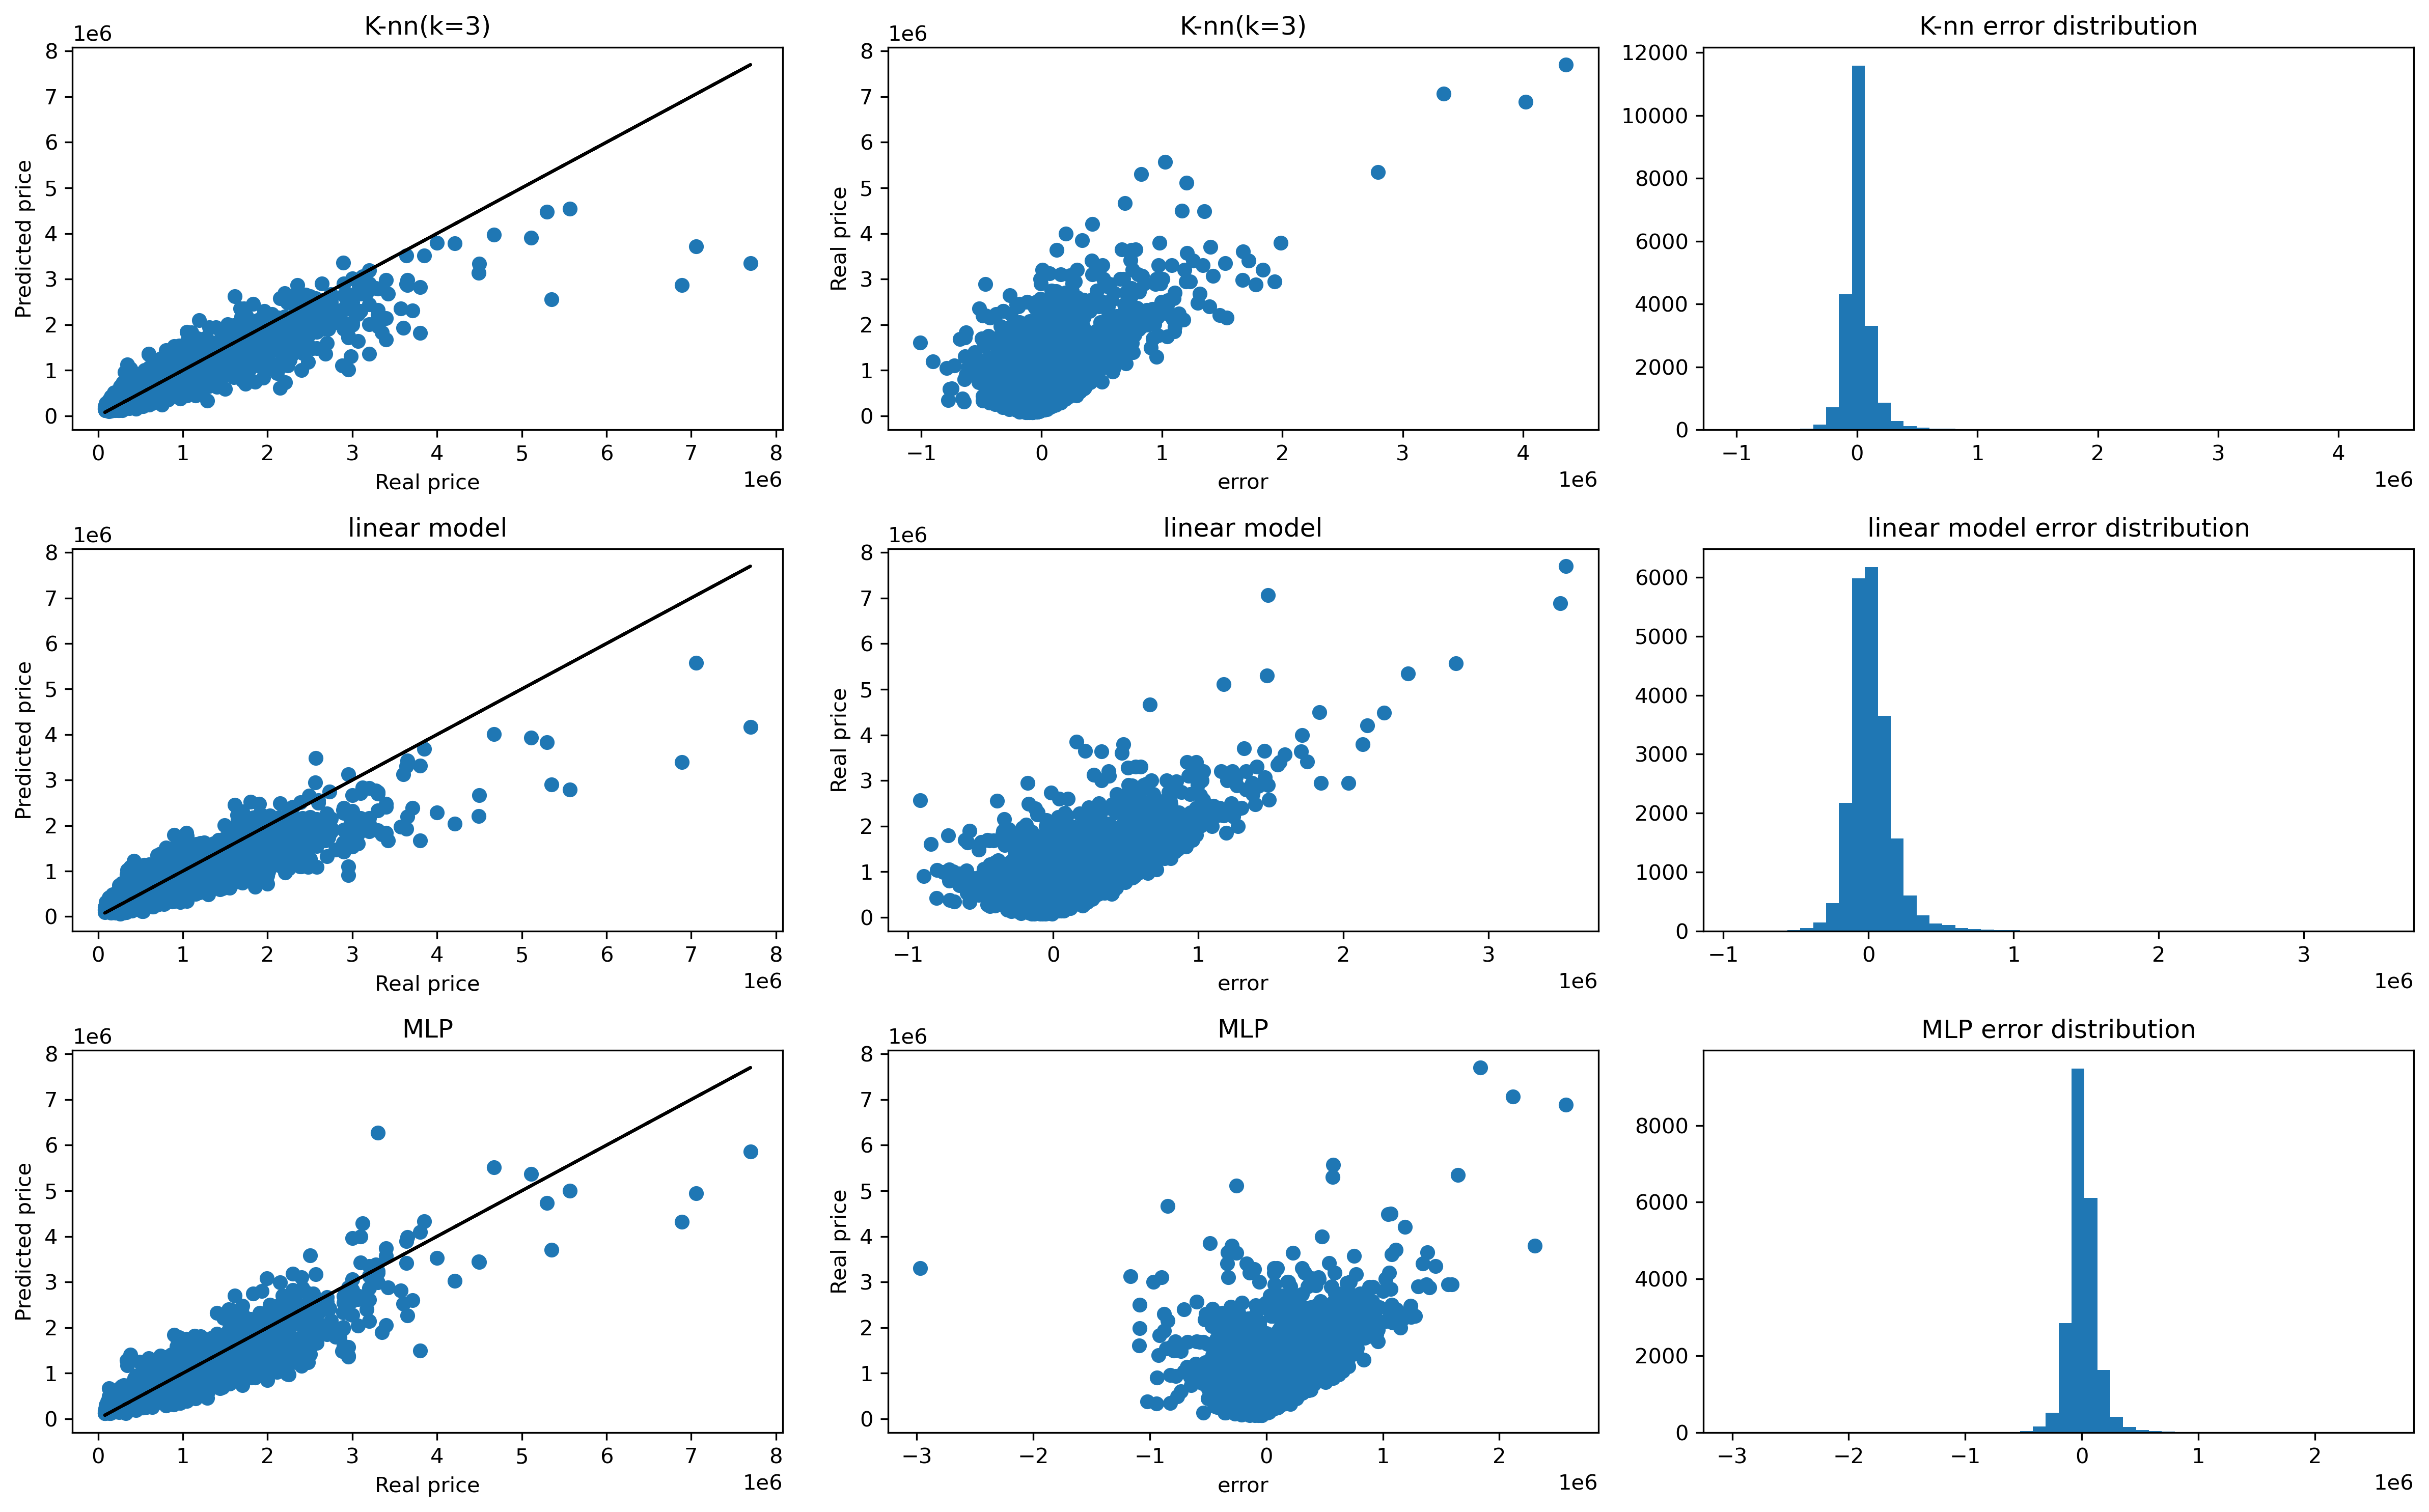

In [225]:
fig, axes = plt.subplots(3,3, figsize=(16,10), dpi=300)

axes[0,0].scatter(x=results.y,y=results.y_pred_knn);
axes[0,0].plot(results.y,results.y,color="black");
axes[0,1].scatter(x=results['y - y_pred_knn'], y=results.y);
axes[0,2].hist(results['y - y_pred_knn'], bins= 50);

axes[0,0].set_xlabel("Real price")
axes[0,0].set_ylabel("Predicted price")
axes[0,0].set_title("K-nn(k=3)")

axes[0,1].set_xlabel("error")
axes[0,1].set_ylabel("Real price")
axes[0,1].set_title("K-nn(k=3)")

axes[0,2].set_title("K-nn error distribution")


axes[1,0].scatter(x=results.y,y=results.y_pred_lr);
axes[1,0].plot(results.y,results.y,color="black");
axes[1,1].scatter(x=results['y - y_pred_lr'], y=results.y);
axes[1,2].hist(results['y - y_pred_lr'], bins=50);

axes[1,0].set_xlabel("Real price")
axes[1,0].set_ylabel("Predicted price")
axes[1,0].set_title("linear model")

axes[1,1].set_xlabel("error")
axes[1,1].set_ylabel("Real price")
axes[1,1].set_title("linear model")

axes[1,2].set_title("linear model error distribution")

axes[2,0].scatter(x=results.y,y=results.y_pred_mlp);
axes[2,0].plot(results.y,results.y,color="black");
axes[2,1].scatter(x=results['y - y_pred_mlp'], y=results.y);
axes[2,2].hist(results['y - y_pred_mlp'],bins=50);

axes[2,0].set_xlabel("Real price")
axes[2,0].set_ylabel("Predicted price")
axes[2,0].set_title("MLP")

axes[2,1].set_xlabel("error")
axes[2,1].set_ylabel("Real price")
axes[2,1].set_title("MLP")

axes[2,2].set_title("MLP error distribution")




plt.tight_layout()
plt.show()